In [1]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd

In [2]:
flipkart_div_classes = {"laptopname":'_4rR01T', "features":"rgWa7D", "price":"_30jeq3", "rating":'_3LWZlK'}
flipkart_search_entry_class = "_2kHMtA"
baseurl = 'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&sort=relevance'

In [3]:
import numpy as np

all_laptop_name = []
all_laptop_price = []
all_laptop_rating = []
all_laptop_features = []

for pageno in range(20):
    URL = baseurl + '&page='+str(pageno)
    page = requests.get(URL)
    soup = BeautifulSoup(page.text)
    
    for x in soup.find_all('div', attrs={'class':flipkart_search_entry_class}):
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['laptopname']})
            all_laptop_name.append(res.text)
        except AttributeError:
            all_laptop_name.append(np.NaN)
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['price']})
            all_laptop_price.append(res.text)
        except AttributeError:
            all_laptop_price.append(np.NaN)
        try:
            res = x.find('div', attrs = {'class':flipkart_div_classes['rating']})
            all_laptop_rating.append(res.text)
        except AttributeError:
            all_laptop_rating.append(np.NaN)
        try:
            res = x.find_all('li', attrs = {'class':flipkart_div_classes['features']})
            all_laptop_features.append("\n".join([feature.text for feature in res]))
        except AttributeError:
            all_laptop_features.append(np.NaN)

    print ("Processing Page: "+str(pageno))

Processing Page: 0
Processing Page: 1
Processing Page: 2
Processing Page: 3
Processing Page: 4
Processing Page: 5
Processing Page: 6
Processing Page: 7
Processing Page: 8
Processing Page: 9
Processing Page: 10
Processing Page: 11
Processing Page: 12
Processing Page: 13
Processing Page: 14
Processing Page: 15
Processing Page: 16
Processing Page: 17
Processing Page: 18
Processing Page: 19


In [ ]:
df = pd.DataFrame({'ProductName':all_laptop_name,
                   'Price':all_laptop_price,
                   'Rating':all_laptop_rating,
                   'Features':all_laptop_features
                  })

In [ ]:
df.to_csv('flipkart_laptop_rawdata.csv')

In [ ]:
df

,ProductName,Price,Rating,Features
0,HP 15s Core i3 11th Gen - (8 GB/512 GB SSD/Win...,"₹45,514",4.4,Intel Core i3 Processor (11th Gen)\n8 GB DDR4 ...
1,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,"₹41,890",4.4,Intel Core i3 Processor (11th Gen)\n8 GB DDR4 ...
2,DELL Inspiron Ryzen 5 Hexa Core 5500U - (8 GB/...,"₹58,590",4.5,AMD Ryzen 5 Hexa Core Processor\n8 GB DDR4 RAM...
3,MSI Modern 14 Core i5 10th Gen - (8 GB/512 GB ...,"₹49,990",4.5,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...
4,Lenovo APU Dual Core A9 A99425 - (4 GB/1 TB HD...,"₹28,000",4.3,AMD APU Dual Core A9 Processor\n4 GB DDR4 RAM\...
...,...,...,...,...
475,MSI Modern 14 Core i7 11th Gen - (8 GB/512 GB ...,"₹69,990",4.4,Intel Core i7 Processor (11th Gen)\n8 GB DDR4 ...
476,acer Aspire Core i5 11th Gen - (8 GB/1 TB HDD/...,"₹57,990",3.8,Intel Core i5 Processor (11th Gen)\n8 GB DDR4 ...
477,ASUS ZenBook Pro 15 Core i9 8th Gen - (16 GB/1...,"₹2,04,990",5,First Ever Screenpad\nNVIDIA GeForce GTX 1050 ...
478,ASUS ExpertBook P2 Core i5 10th Gen - (8 GB/1 ...,"₹83,990",NaN,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...


In [ ]:
df = pd.read_csv("flipkart_laptop_rawdata.csv")


In [ ]:
df

,Unnamed: 0,ProductName,Price,Rating,Features
0,0,HP 15s Ryzen 3 Dual Core 3250U - (8 GB/1 TB HD...,"₹36,046",4.2,AMD Ryzen 3 Dual Core Processor\n8 GB DDR4 RAM...
1,1,HP Pavilion Gaming Ryzen 5 Quad Core 3550H - (...,"₹49,990",4.2,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...
2,2,HP 14s Ryzen 3 Quad Core 4300U - (8 GB/512 GB ...,"₹39,490",4.4,AMD Ryzen 3 Quad Core Processor\n8 GB DDR4 RAM...
3,3,Avita Cosmos 2 in 1 Celeron Dual Core - (4 GB/...,"₹17,990",NaN,Intel Celeron Dual Core Processor\n4 GB DDR4 R...
4,4,HP 15s Ryzen 5 Quad Core 3500U - (8 GB/512 GB ...,"₹46,990",4.4,AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM...
...,...,...,...,...,...
475,475,HP 15s Core i5 10th Gen - (8 GB/1 TB HDD/Windo...,"₹53,490",4.2,Intel Core i5 Processor (10th Gen)\n8 GB DDR4 ...
476,476,DELL Inspiron 5000 Core i3 10th Gen - (4 GB/51...,"₹57,390",3.5,Intel Core i3 Processor (10th Gen)\n4 GB DDR4 ...
477,477,HP 15s Ryzen 3 Dual Core 3250U - (4 GB/1 TB HD...,"₹29,990",3.9,AMD Ryzen 3 Dual Core Processor\n4 GB DDR4 RAM...
478,478,HP 250 G8 Core i5 11th Gen - (8 GB/1 TB HDD/Wi...,"₹57,499",NaN,Intel Core i5 Processor (11th Gen)\n8 GB DDR4 ...


In [ ]:
df.Features[1]

'AMD Ryzen 5 Quad Core Processor\n8 GB DDR4 RAM\n64 bit Windows 10 Operating System\n1 TB HDD\n39.62 cm (15.6 inch) Display\n1 Year Onsite Warranty'

In [ ]:
def get_processor_name(features):
    try:
        returnable = re.compile(regex).findall(x)[0]
    except:
        returnable = ''
    return returnable

regex = r'^\w+'
df['ProcessorName'] = df['Features'].apply(lambda x : re.compile(regex).findall(x)[0])
regex = r'[AMD|Intel][A-Za-z0-9\s]+ Processor'
df['ProcessorDetails'] = df['Features'].apply(lambda x : re.compile(regex).findall(x)[0])
regex = r'[0-9][0-9]?\s+GB+[\d\sA-Za-z]+RAM'
df['RAM'] = df['Features'].apply(lambda x : re.compile(regex).findall(x)[0])
regex = r'(\d\d?)\sGB'
df['RAMSize'] = df['RAM'].apply(lambda x : re.compile(regex).findall(x)[0])
regex = r'[Windows|MAC|DOS]+\s?\d+\s?Operating System'
df['OS'] = df['Features'].apply(lambda x : re.compile(regex).findall(x))
regex = r'\d+\sbit'
df['OSBit'] = df['Features'].apply(lambda x : re.compile(regex).findall(x))
regex = r'^\w+'
df['Brand'] = df['ProductName'].apply(lambda x : re.compile(regex).findall(x)[0])
regex = r'\d{1,3}\s[GT]B\s[SH][DS]D'
df['Harddrive'] = df['Features'].apply(lambda x : re.compile(regex).findall(x))

## Cleaning poorly formatted Columns

In [ ]:
df['OS'] = df['OS'].apply(lambda x : ''.join(x))
df['OSBit'] = df['OSBit'].apply(lambda x : ''.join(x))
df['Harddrive'] = df['Harddrive'].apply(lambda x : ''.join(x))

## Cleaning the Price field for rupee symbol and converting to float

In [ ]:
df['Price'][4].replace('₹', '').replace(',','')
df['Price'] = df['Price'].apply(lambda x : x.replace('₹', '').replace(',','')).astype(float)       
df['RAMSize'] = df['RAMSize'].astype(float)

'46990'

In [ ]:
df.to_csv('flipkart_filtered.csv')

# Task: Perform EDA on Flipkart Dataset that you just collected and prepared

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        480 non-null    int64  
 1   ProductName       480 non-null    object 
 2   Price             480 non-null    float64
 3   Rating            359 non-null    float64
 4   Features          480 non-null    object 
 5   ProcessorName     480 non-null    object 
 6   ProcessorDetails  480 non-null    object 
 7   RAM               480 non-null    object 
 8   OS                480 non-null    object 
 9   OSBit             480 non-null    object 
 10  Brand             480 non-null    object 
 11  Harddrive         480 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 45.1+ KB


In [ ]:
df.describe()

,Unnamed: 0,Price,Rating,RAMSize
count,480.000000,480.000000,359.000000,480.000000
mean,239.500000,67681.258333,4.277437,8.600000
std,138.708327,46091.258866,0.339105,4.811954
min,0.000000,17990.000000,2.700000,4.000000
25%,119.750000,38990.000000,4.100000,8.000000
50%,239.500000,54994.000000,4.300000,8.000000
75%,359.250000,74990.000000,4.500000,8.000000
max,479.000000,319990.000000,5.000000,32.000000


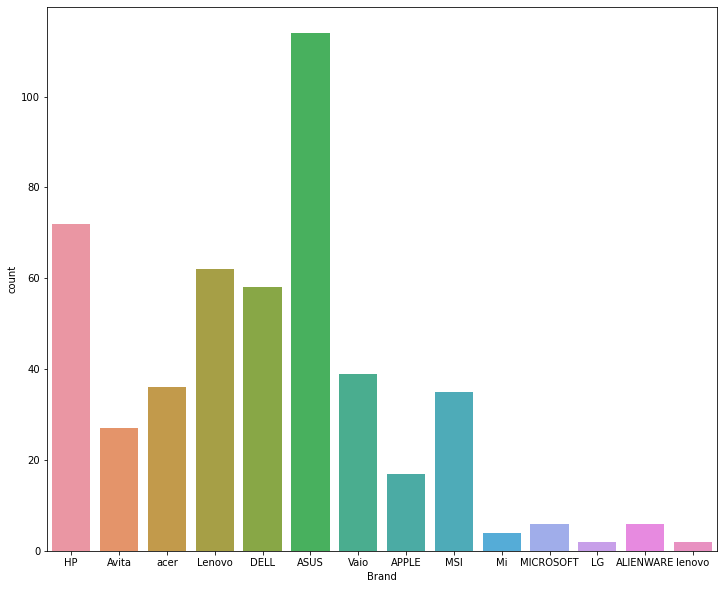

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.countplot( x ="Brand",data=df)


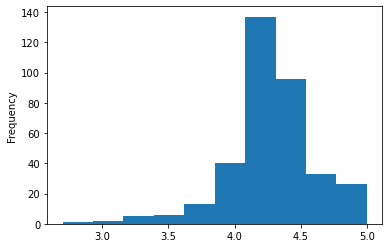

In [ ]:
df['Rating'].plot(kind= "hist")

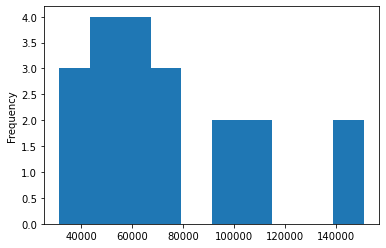

In [ ]:
df.groupby('Rating').mean()['Price'].plot(kind ="hist")


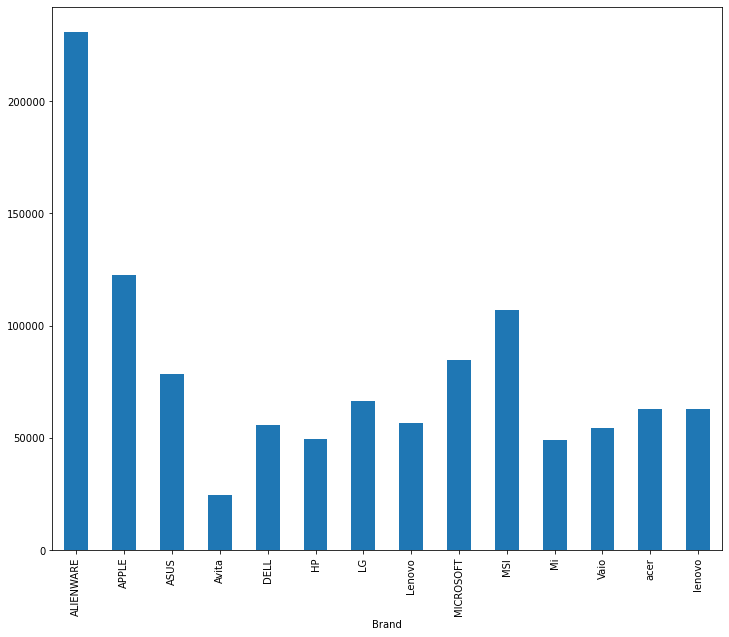

In [ ]:
plt.figure(figsize=(12,10))
df.groupby('Brand').mean()['Price'].plot(kind='bar')
plt.show()


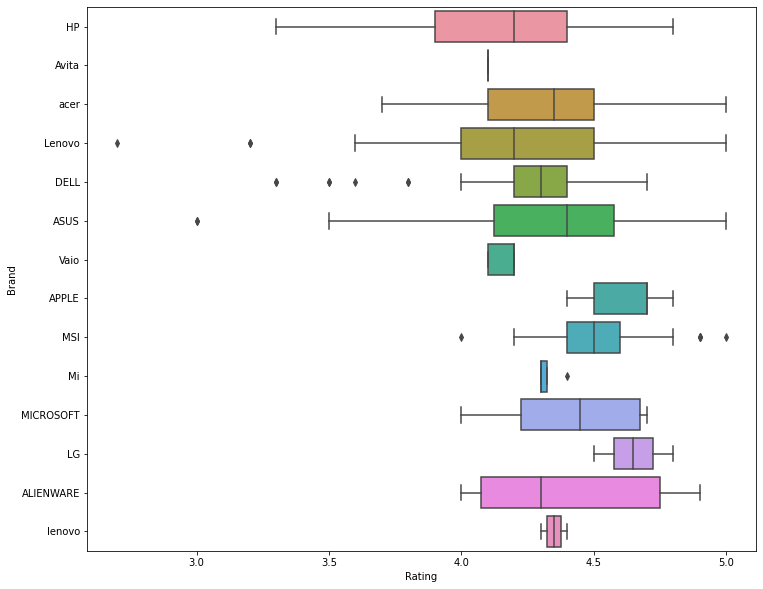

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Rating',y = "Brand", data=df)
plt.show()


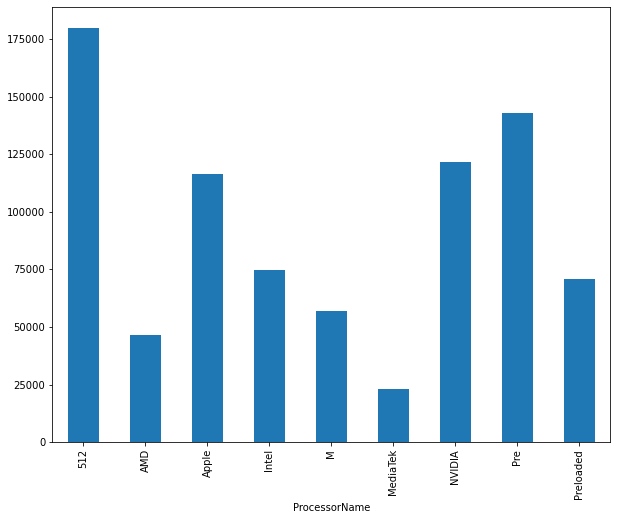

In [ ]:
plt.figure(figsize=(10,8))
df.groupby('ProcessorName').mean()['Price'].plot(kind='bar')
plt.show()


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

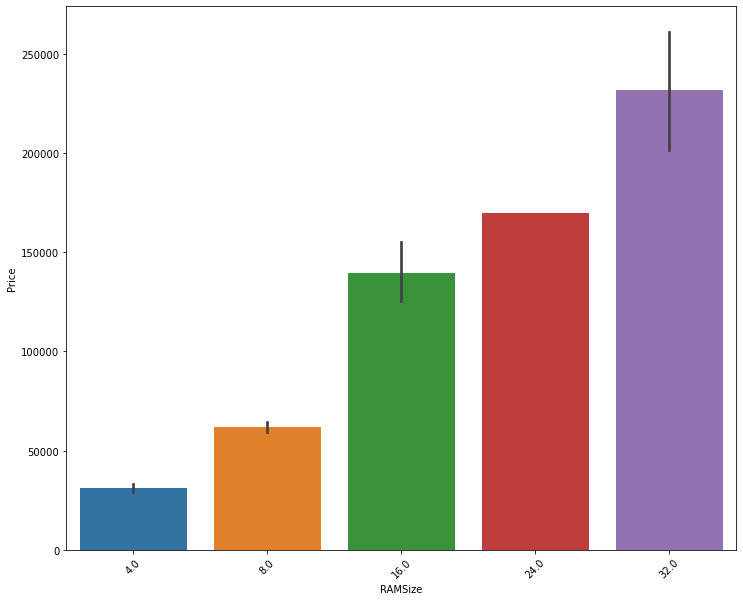

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(x = "RAMSize",y = "Price", data = df)
plt.xticks(rotation = 45)


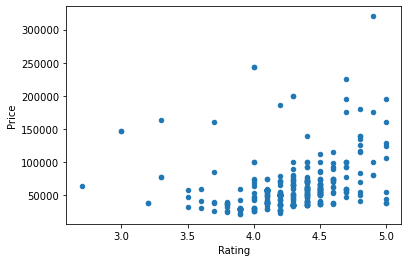

In [ ]:
df.plot(x="Rating", y="Price", kind="scatter")


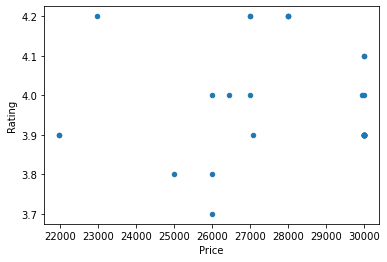

In [ ]:
df[df["Price"]<30000].plot(x="Price",y="Rating",kind="scatter")

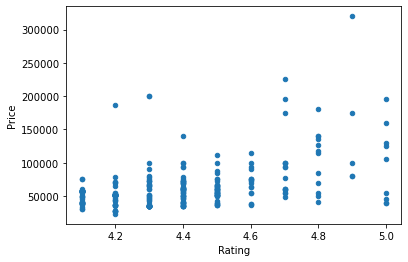

In [ ]:
df[df["Rating"]>4].plot(x="Rating",y="Price",kind="scatter")

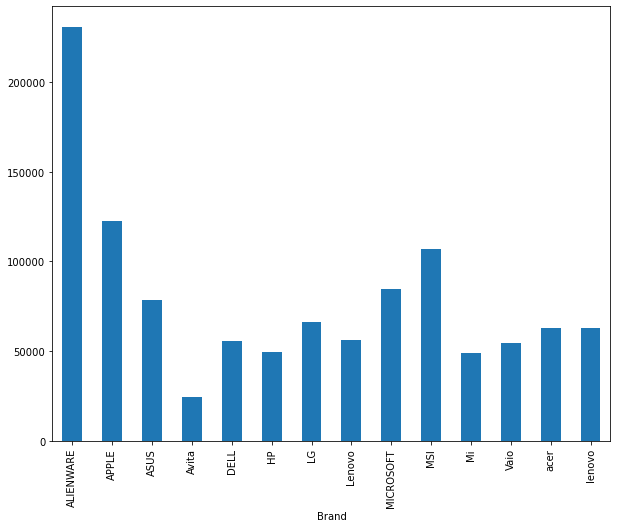

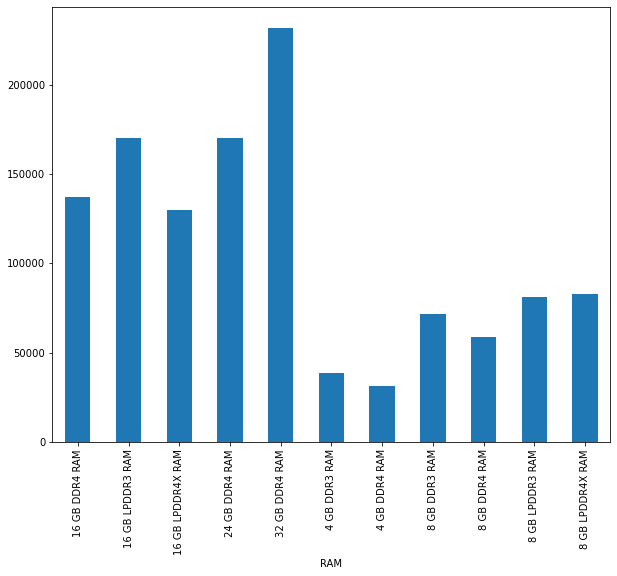

In [ ]:
plt.figure(figsize=(10,8))
df.groupby('Brand').mean()['Price'].plot(kind='bar')
plt.show()
plt.figure(figsize=(10,8))
df.groupby('RAM').mean()['Price'].plot(kind='bar')
plt.show()


In [ ]:
list(range(15000,350000,20000))

[15000,
 35000,
 55000,
 75000,
 95000,
 115000,
 135000,
 155000,
 175000,
 195000,
 215000,
 235000,
 255000,
 275000,
 295000,
 315000,
 335000]

(array([159., 204.,  55.,  21.,  16.,   9.,   6.,   7.,   2.,   0.,   1.]),
 array([ 15000,  45000,  75000, 105000, 135000, 165000, 195000, 225000,
        255000, 285000, 315000, 345000]),
 <a list of 11 Patch objects>)

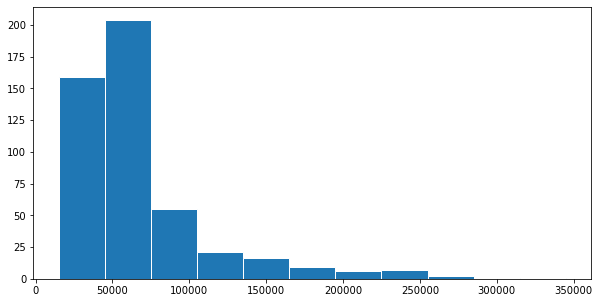

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['Price'], edgecolor='w', bins = range(15000,350000,30000))

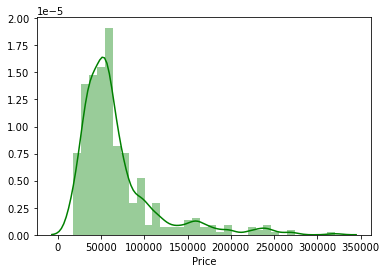

In [ ]:
sns.distplot(df['Price'],color='Green')
plt.show()


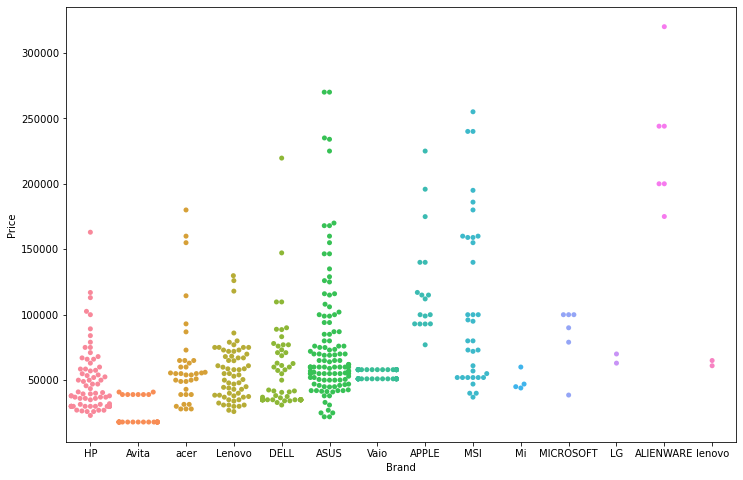

In [ ]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Brand', y='Price',data=df)
plt.show()


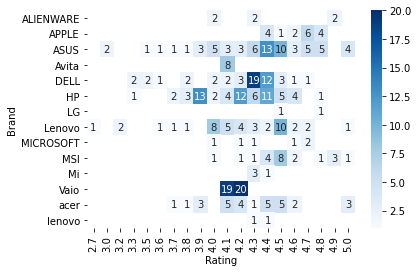

In [ ]:
grp = df.groupby(['Brand','Rating'])
pclass_survived = grp.size().unstack()
pclass_survived
sns.heatmap(pclass_survived, cmap="Blues", annot = True)
    